# Plataforma para que menos personas de 65 años o más vivan solas

## 🧾Data Science  

Para los de Data tendréis el siguiente Dataset para poder utilizar, ofrecido por el ayuntamiento de Barcelona: https://opendata-ajuntament.barcelona.cat/data/ca/dataset/divter/resource/ed515bb8-502b-4dff-96dc-769f72767919  

La tarea principal que tendréis es la de poder extraer la información de estos PDFs a un fichero de CSV. Esto será para que los de Back puedan conectar vuestros datos y realizar ellos las llamadas correspondientes.

Una vez obtenidos los datos deberéis relacionar los diferentes parámetros a continuación para analizar cuales son las zonas de la ciudad donde hay más personas mayores viviendo solas en relación con la pobreza del barrio:

- Nombre del barrio
- Titulados superiores i CFGS
- Número de parados
- Renta familiar
- Población de más de 65 años que vive sola
- Índice de sobreenvejicimiento

In [1]:
#data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tabula
import requests
from tika import parser
import PyPDF2

**Abrir CSV**

In [2]:
df = pd.read_csv("2019_divter.csv")
df.head (5)

,CODI_DIVISIO_TERRITORIAL,NOM_DIVISIO_TERRITORIAL,CATEGORIA_DIVISIO,CODI_DIVISIO_TERRITORIAL_PARE,URL_FITXA_DIVISIO_TERRITORIAL
0,B-01,el Raval,Barri,D-01,https://ajuntament.barcelona.cat/estadistica/c...
1,B-02,el Barri Gòtic,Barri,D-01,https://ajuntament.barcelona.cat/estadistica/c...
2,B-03,la Barceloneta,Barri,D-01,https://ajuntament.barcelona.cat/estadistica/c...
3,B-04,"Sant Pere, Santa Caterina i la Ribera",Barri,D-01,https://ajuntament.barcelona.cat/estadistica/c...
4,B-05,el Fort Pienc,Barri,D-02,https://ajuntament.barcelona.cat/estadistica/c...


In [3]:
df.nunique()

CODI_DIVISIO_TERRITORIAL         83
NOM_DIVISIO_TERRITORIAL          82
CATEGORIA_DIVISIO                 2
CODI_DIVISIO_TERRITORIAL_PARE    10
URL_FITXA_DIVISIO_TERRITORIAL    73
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   CODI_DIVISIO_TERRITORIAL       83 non-null     object
 1   NOM_DIVISIO_TERRITORIAL        83 non-null     object
 2   CATEGORIA_DIVISIO              83 non-null     object
 3   CODI_DIVISIO_TERRITORIAL_PARE  73 non-null     object
 4   URL_FITXA_DIVISIO_TERRITORIAL  73 non-null     object
dtypes: object(5)
memory usage: 3.4+ KB


In [5]:
df.isna().sum()

CODI_DIVISIO_TERRITORIAL          0
NOM_DIVISIO_TERRITORIAL           0
CATEGORIA_DIVISIO                 0
CODI_DIVISIO_TERRITORIAL_PARE    10
URL_FITXA_DIVISIO_TERRITORIAL    10
dtype: int64

**Se eliminan las columnas que no tienen URL**

In [6]:
df = df.dropna()

**Crear DataFrame para almacenar los parámetros indicados**

In [7]:
final = pd.DataFrame(columns = ['Nombre del barrio', 
                                     'Titulados superiores i CFGS',
                                     'Poblacion > 65 años',
                                     'Renta familiar', 
                                     'index',
                                     'Numero de parados'])

**FOR LOOP para leer URL, descargar + leer + extraer datos del PDF**

In [8]:
for i, url in enumerate(df['URL_FITXA_DIVISIO_TERRITORIAL']):
    myfile = requests.get(url, allow_redirects=True)
    file_name = r'C:\Users\Pepo\IT ACADEMY DATA SCIENCE\HACKATLON OCTUBRE 2022\Archivos pdf/' + str(i) + '.pdf'
    with open(file_name, 'wb') as f:
        f.write(myfile.content)
      
    # creating a pdf reader object
    fileReader = PyPDF2.PdfFileReader(file_name)

    text = ''
    for page in fileReader.pages:
        text += page.extract_text() + "\n"
        data = text.split('\n') 
    
    #for i, line in enumerate(data):
    #print (i, data) - Con esto se puede observar fácilmente los índices
    
    final = final.append({'Nombre del barrio' : data[0].strip(),
                        'Titulados superiores i CFGS' : data[32].split(' ')[-3],
                        'Poblacion > 65 años' : data[34].split(' ')[-3],
                        'Renta familiar' : data[40].split(' ')[-3],
                        'index' : data[35].split(' ')[-3],
                        'Numero de parados' : data[39].split(' ')[-3]}, 
                        ignore_index=True)       

**Reviso mi DataFrame obtenido**

In [9]:
final.head(10)

,Nombre del barrio,Titulados superiores i CFGS,Poblacion > 65 años,Renta familiar,index,Numero de parados
0,Barri el Raval,"27,2","31,9","71,2","50,7",3.074
1,Barri el Barri Gòtic,"32,7","30,2","106,1","50,2",892
2,Barri la Barceloneta,"30,6","32,8","79,6","58,1",978
3,"Barri Sant Pere, Santa Caterina i",788,"6,3",1.346,"33,6","28,1"
4,Barri el Fort Pienc,"40,4","25,3","106,5","52,3",1.156
5,Barri la Sagrada Família,"39,5","27,5","101,8","53,5",1.917
6,Barri la Dreta de l’Eixample,"52,8","27,1","175,9","54,0",1.255
7,Barri l’ Antiga Esquerra de,717,"7,2",1.345,"29,0","24,7"
8,Barri la Nova Esquerra de,612,"7,4",2.117,"26,8","24,9"
9,Barri Sant Antoni,"38,9","28,5","104,2","56,4",1.535


In [10]:
final.nunique()

Nombre del barrio              73
Titulados superiores i CFGS    70
Poblacion > 65 años            60
Renta familiar                 71
index                          64
Numero de parados              72
dtype: int64

In [11]:
#null
final.isnull().sum()

Nombre del barrio              0
Titulados superiores i CFGS    0
Poblacion > 65 años            0
Renta familiar                 0
index                          0
Numero de parados              0
dtype: int64

In [12]:
#NaN
final.isna().sum()

Nombre del barrio              0
Titulados superiores i CFGS    0
Poblacion > 65 años            0
Renta familiar                 0
index                          0
Numero de parados              0
dtype: int64

In [13]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Nombre del barrio            73 non-null     object
 1   Titulados superiores i CFGS  73 non-null     object
 2   Poblacion > 65 años          73 non-null     object
 3   Renta familiar               73 non-null     object
 4   index                        73 non-null     object
 5   Numero de parados            73 non-null     object
dtypes: object(6)
memory usage: 3.5+ KB


**Cambio Dtype de los parámetros**

In [18]:
for column in final[['Titulados superiores i CFGS',
                     'Poblacion > 65 años',
                     'Renta familiar', 
                     'index',
                     'Numero de parados']]:

    final[column] = final[column].str.replace('.', '')
    final[column] = final[column].str.replace(',', '.').astype(float)



C:\Users\Pepo\AppData\Local\Temp/ipykernel_9052/1821407289.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final[column] = final[column].str.replace('.', '')


In [19]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nombre del barrio            73 non-null     object 
 1   Titulados superiores i CFGS  73 non-null     float64
 2   Poblacion > 65 años          73 non-null     float64
 3   Renta familiar               73 non-null     float64
 4   index                        73 non-null     float64
 5   Numero de parados            73 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.5+ KB


In [20]:
final.head()

,Nombre del barrio,Titulados superiores i CFGS,Poblacion > 65 años,Renta familiar,index,Numero de parados
0,Barri el Raval,27.2,31.9,71.2,50.7,3074.0
1,Barri el Barri Gòtic,32.7,30.2,106.1,50.2,892.0
2,Barri la Barceloneta,30.6,32.8,79.6,58.1,978.0
3,"Barri Sant Pere, Santa Caterina i",788.0,6.3,1346.0,33.6,28.1
4,Barri el Fort Pienc,40.4,25.3,106.5,52.3,1156.0


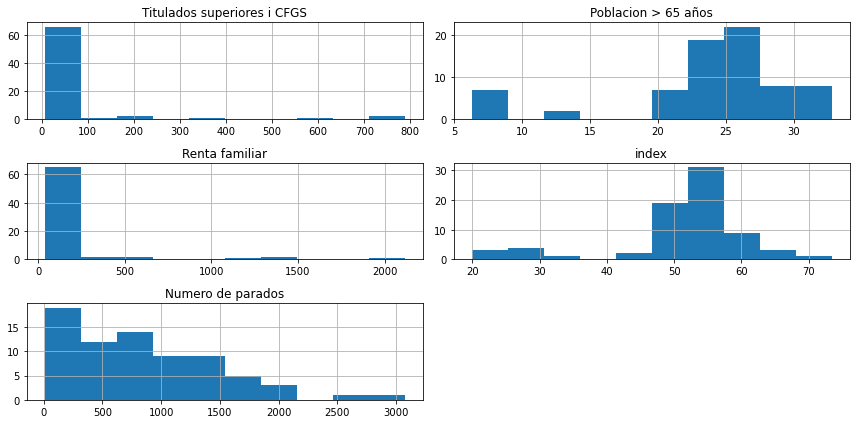

In [22]:
final.hist(figsize=(12,6))
plt.tight_layout()

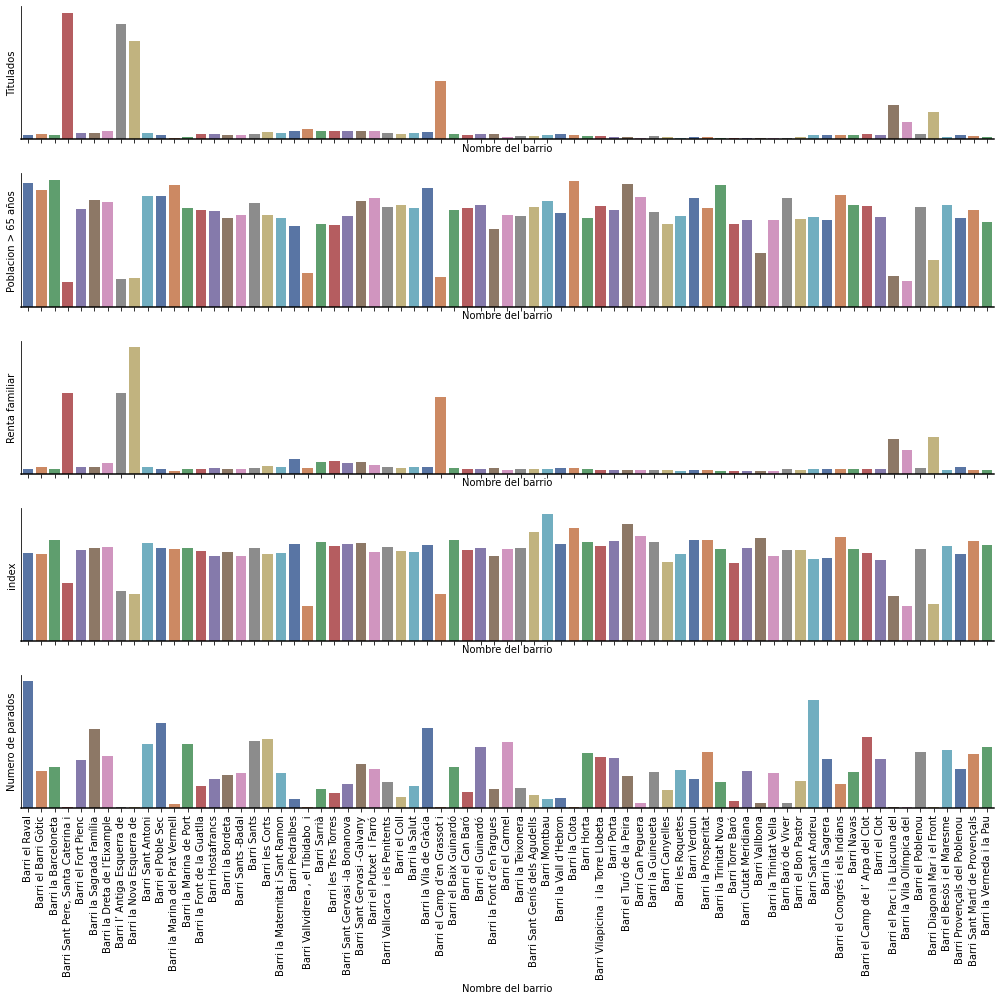

In [33]:
# Set up the matplotlib figure
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(14, 14), sharex=True)


x = final['Nombre del barrio']
y1 = final['Titulados superiores i CFGS']
sns.barplot(x=x, y=y1, palette="deep", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Titulados")


y2 = final['Poblacion > 65 años']
sns.barplot(x=x, y=y2, palette="deep", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Poblacion > 65 años")


y3 = final['Renta familiar']
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Renta familiar")


y4 = final['index']
sns.barplot(x=x, y=y4, palette="deep", ax=ax4)
ax4.axhline(0, color="k", clip_on=False)
ax4.set_ylabel("index")


y5 = final['Numero de parados']
sns.barplot(x=x, y=y5, palette="deep", ax=ax5)
ax5.axhline(0, color="k", clip_on=False)
ax5.set_ylabel("Numero de parados")

# Finalize the plot
sns.despine(bottom=True)
plt.xticks(rotation = 90)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

**Guardar como CSV y JSON**

In [35]:
#save as csv 
final.to_csv("data_barrios.csv", index = False)

#save as json 
final.to_json("data_barrios.json",orient='split', index = False)